In [1]:
# 引包
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import minimize
from sklearn.preprocessing import PolynomialFeatures

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)

%matplotlib inline
import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

In [2]:
# 加载数据
def loaddata(file, delimiter):
    data = np.loadtxt(file, delimiter=delimiter)
    return data


# 根据正负样本画图
def plotData(data, label_x, label_y, label_pos, label_neg, axes=None):
    # 获得正负样本的下标(即哪些是正样本，哪些是负样本)
    neg = data[:, 2] == 0
    pos = data[:, 2] == 1

    if axes == None:
        axes = plt.gca()
    axes.scatter(data[pos][:, 0], data[pos][:, 1], marker='+', c='k', s=60, linewidth=2, label=label_pos)
    axes.scatter(data[neg][:, 0], data[neg][:, 1], c='y', s=60, label=label_neg)
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend(frameon=True, fancybox=True);

In [3]:
# 定义sigmoid
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


# 损失函数
def compute_Loss(theta, X, y):
    m = y.size
    h = sigmoid(X.dot(theta))
    # loss = -1.0 / m * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    loss = -1.0 * (1.0 / m) * (np.log(h).T.dot(y) + np.log(1 - h).T.dot(1 - y))
    # print(loss, ' : ', J)
    if np.isnan(loss[0]):
        return np.inf
    return loss[0]


# 求解梯度
def gradient(theta, X, y):
    m = y.size
    h = sigmoid(X.dot(theta.reshape(-1, 1)))
    grad = (1.0 / m) * X.T.dot(h - y)
    return grad.flatten()

In [4]:
data = loaddata('data1.txt', ',')
X = np.c_[np.ones((data.shape[0], 1)), data[:, 0:2]]
y = np.c_[data[:, 2]]
initial_theta = np.zeros(X.shape[1])

res = minimize(compute_Loss, initial_theta, args=(X, y), jac=gradient, options={'maxiter': 400})
print(res)
sigmoid(np.array([1, 45, 85]).dot(res.x.T))



      fun: 0.20349770158950983
 hess_inv: array([[ 2.85339493e+03, -2.32908823e+01, -2.27416470e+01],
       [-2.32908823e+01,  2.04489131e-01,  1.72969525e-01],
       [-2.27416470e+01,  1.72969525e-01,  1.96170322e-01]])
      jac: array([-2.68557631e-09,  4.36433478e-07, -1.39671758e-06])
  message: 'Optimization terminated successfully.'
     nfev: 34
      nit: 25
     njev: 30
   status: 0
  success: True
        x: array([-25.16131634,   0.2062316 ,   0.20147143])


C:\Application\Anaconda\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
C:\Application\Anaconda\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


0.7762903249331015

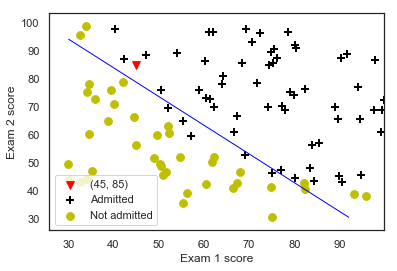

In [5]:
plt.scatter(45, 85, s=60, c='r', marker='v', label='(45, 85)')
plotData(data, 'Exam 1 score', 'Exam 2 score', 'Admitted', 'Not admitted')
x1_min, x1_max = X[:,1].min(), X[:,1].max(),
x2_min, x2_max = X[:,2].min(), X[:,2].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
h = sigmoid(np.c_[np.ones((xx1.ravel().shape[0],1)), xx1.ravel(), xx2.ravel()].dot(res.x))
h = h.reshape(xx1.shape)
plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='b')

## 加正则

In [6]:
# 定义损失函数
def compute_Loss_Reg(theta, reg, *args):
    m = y.size
    h = sigmoid(XX.dot(theta))

    loss = -1.0 * (1.0 / m) * (np.log(h).T.dot(y) + np.log(1 - h).T.dot(1 - y)) + (reg / (2.0 * m)) * np.sum(
        np.square(theta[1:]))

    if np.isnan(loss[0]):
        return np.inf
    return loss[0]


def gradientReg(theta, reg, *args):
    m = y.size
    h = sigmoid(XX.dot(theta.reshape(-1, 1)))

    grad = (1.0 / m) * XX.T.dot(h - y) + (reg / m) * np.r_[[[0]], theta[1:].reshape(-1, 1)]

    return grad.flatten()

def predict(theta, X, threshold=0.5):
    p = sigmoid(X.dot(theta.T)) >= threshold
    return (p.astype('int'))

In [7]:
data2 = loaddata('data2.txt', ',')
y = np.c_[data2[:, 2]]
X = data2[:, 0:2]
# 使用高阶 最高 6 阶
poly = PolynomialFeatures(6)
XX = poly.fit_transform(data2[:, 0:2])
initial_theta = np.zeros(XX.shape[1])

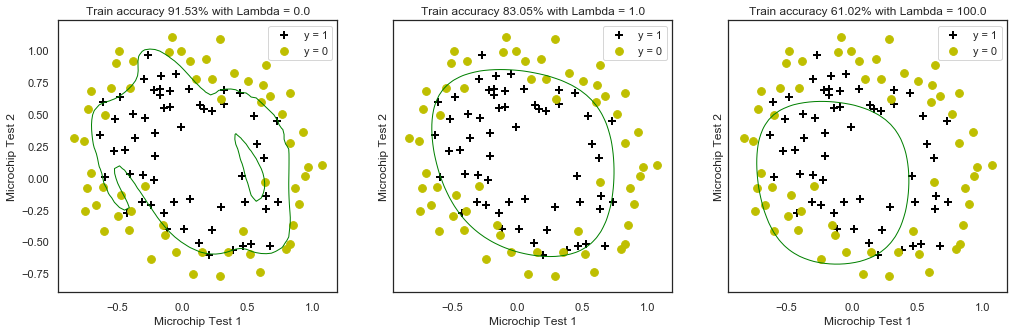

In [8]:
fig, axes = plt.subplots(1, 3, sharey=True, figsize=(17, 5))
for i, C in enumerate([0.0, 1.0, 100.0]):
    # 最优化 costFunctionReg
    res2 = minimize(compute_Loss_Reg, initial_theta, args=(C, XX, y), jac=gradientReg, options={'maxiter': 3000})

    # 准确率
    accuracy = 100.0 * sum(predict(res2.x, XX) == y.ravel()) / y.size

    # 对X,y的散列绘图
    plotData(data2, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0', axes.flatten()[i])

    # 画出决策边界
    x1_min, x1_max = X[:, 0].min(), X[:, 0].max(),
    x2_min, x2_max = X[:, 1].min(), X[:, 1].max(),
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
    h = sigmoid(poly.fit_transform(np.c_[xx1.ravel(), xx2.ravel()]).dot(res2.x))
    h = h.reshape(xx1.shape)
    axes.flatten()[i].contour(xx1, xx2, h, [0.5], linewidths=1, colors='g');
    axes.flatten()[i].set_title('Train accuracy {}% with Lambda = {}'.format(np.round(accuracy, decimals=2), C))
